In [82]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
#dataDict = np.load('datainput_FinerGrid.npy')[()]
dataDict = np.load('datanewLast3dScan.npy')[()]
qp.printDictKeys(dataDict)
dataDict['kinCube'].shape, dataDict['potCube'].shape, dataDict['dipCUBE'].shape, dataDict['geoCUBE'].shape

dict_keys(['kinCube', 'potCube', 'dipCUBE', 'geoCUBE', 'phis', 'gams', 'thes'])


((25, 26, 100, 9, 3),
 (25, 26, 100, 8),
 (25, 26, 100, 3, 8, 8),
 (25, 26, 100, 15, 3))

In [83]:
gsm_phi_ind = dataDict['phis'].index('P000-000')
gsm_gam_ind = dataDict['gams'].index('P016-923')
gsm_the_ind = dataDict['thes'].index('P114-804')

gsm_phi_ind, gsm_gam_ind, gsm_the_ind

(14, 15, 21)

In [84]:
import quantumpropagator as qp
from quantumpropagator import labTranformA,fromLabelsToFloats

phiV, gamV, theV = fromLabelsToFloats(dataDict)

phis = labTranformA(dataDict['phis'])
gams = labTranformA(dataDict['gams'])
thes = labTranformA(dataDict['thes'])

phiL = len(phis)
gamL = len(gams)
theL = len(thes)

In [85]:
phis,phiV,phiV[0]-phiV[-1],phiV[0]-phiV[1],phiL

(array([-7. , -6.5, -6. , -5.5, -5. , -4.5, -4. , -3.5, -3. , -2.5, -2. ,
        -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,
         4. ,  4.5,  5. ]),
 array([-0.07 , -0.065, -0.06 , -0.055, -0.05 , -0.045, -0.04 , -0.035,
        -0.03 , -0.025, -0.02 , -0.015, -0.01 , -0.005,  0.   ,  0.005,
         0.01 ,  0.015,  0.02 ,  0.025,  0.03 ,  0.035,  0.04 ,  0.045,
         0.05 ]),
 -0.12000000000000001,
 -0.0050000000000000044,
 25)

In [86]:
gams,gamV,gamV[0]-gamV[-1],gamV[0]-gamV[1],gamL

(array([ 12.308,  12.615,  12.923,  13.231,  13.538,  13.846,  14.154,
         14.462,  14.769,  15.077,  15.385,  15.692,  16.   ,  16.308,
         16.615,  16.923,  17.231,  17.538,  17.846,  18.154,  18.462,
         18.769,  19.077,  19.385,  19.692,  20.   ]),
 array([ 0.21481512,  0.22017329,  0.2255489 ,  0.23092451,  0.23628267,
         0.24165829,  0.2470339 ,  0.25240952,  0.25776768,  0.26314329,
         0.26851891,  0.27387707,  0.27925268,  0.28462829,  0.28998646,
         0.29536207,  0.30073768,  0.30609584,  0.31147146,  0.31684707,
         0.32222269,  0.32758085,  0.33295646,  0.33833208,  0.34369024,
         0.34906585]),
 -0.13425072606340382,
 -0.0053581608036226136,
 26)

In [87]:
thes,theV,theV[0]-theV[-1],theV[0]-theV[1], theL

(array([ 124.19 ,  123.743,  123.296,  122.849,  122.402,  121.955,
         121.508,  121.061,  120.615,  120.168,  119.721,  119.274,
         118.827,  118.38 ,  117.933,  117.486,  117.039,  116.592,
         116.145,  115.698,  115.251,  114.804,  114.358,  113.911,
         113.464,  113.017,  112.57 ,  112.123,  111.676,  111.229,
         110.782,  110.335,  109.888,  109.441,  108.994,  108.547,
         108.101,  107.654,  107.207,  106.76 ,  106.313,  105.866,
         105.419,  104.972,  104.525,  104.078,  103.631,  103.184,
         102.737,  102.291,  101.844,  101.397,  100.95 ,  100.503,
         100.056,   99.609,   99.162,   98.715,   98.268,   97.821,
          97.374,   96.927,   96.48 ,   96.034,   95.587,   95.14 ,
          94.693,   94.246,   93.799,   93.352,   92.905,   92.458,
          92.011,   91.564,   91.117,   90.67 ,   90.223,   89.777,
          89.33 ,   88.883,   88.436,   87.989,   87.542,   87.095,
          86.648,   86.201,   85.754,   85.307, 

In [88]:
#gspotALL = dataDict['potCube']
#gspot = gspotALL[:,:,:,0]
#gspot2 = np.empty_like(gspot)
#gspotALL2 = np.zeros_like(gspotALL)
#
#print(gspot.shape,np.amin(gspot),np.amax(gspot),np.amax(gspot)-np.amin(gspot))#

#p_s = 0.01
#g_s = 100
#t_s = 100
#p0 = phiV[14] 
#g0 = gamV[10]
#t0 = theV[14]

#for pi, p in enumerate(phiV):
#    for gi, g in enumerate(gamV):
#        for ti,t in enumerate(theV):
#             gspot2[pi,gi,ti] = p_s*(p-p0)**2 + g_s*(g-g0)**2 + t_s*(t-t0)**2
#                
#gspotALL2[:,:,:,0] = gspot23

#dataDict['potCube'] = gspotALL2

#saveNew = True
#if saveNew:
#    np.save('datainput_FinerGrid_potential.npy', dataDict)

In [89]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from ipywidgets import interact,fixed #, interactive, fixed, interact_manual
import ipywidgets as widgets

def do3dplot(xs,ys,zss):
    'with mesh function'
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    X,Y = np.meshgrid(ys,xs)
    #ax.plot_wireframe(X, Y, zss)
    ax.scatter(X, Y, zss)
    
def do3dplot2(X,Y,Z):
    'without mesh function'
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    #ax.plot_wireframe(X, Y, Z)
    ax.scatter(X, Y, Z)
    


## K matrix elements

In [90]:
def kinElem(mkelem,deriv,phi):
    expl = '{}\'th order derivative coefficient in K matrix'.format(deriv)
    tis = ['Tpp','Tpg','Tpt','Tgp','Tgg','Tgt','Ttp','Ttg','Ttt']
    tisexpl = '{} -> '.format(tis[mkelem])
    print(tisexpl + expl)
    x = gams
    y = thes
    z = dataDict['kinCube'][phi,:,:,mkelem,deriv]
    do3dplot(x,y,z)

interact(kinElem, mkelem = widgets.IntSlider(min=0,max=8,step=1,value=0), deriv = widgets.IntSlider(min=0,max=2,step=1,value=0),phi = widgets.IntSlider(min=0,max=phiL-1,step=1,value=0));

interactive(children=(IntSlider(value=0, description='mkelem', max=8), IntSlider(value=0, description='deriv',…

In [91]:
dataDict['kinCube'][11,10,14],dataDict['kinCube'][8,10,14]

(array([[  0.00000000e+00,   0.00000000e+00,  -8.34950834e-08],
        [  0.00000000e+00,  -1.65070523e-09,  -3.94680354e-09],
        [  0.00000000e+00,  -7.49581628e-11,  -7.13581108e-09],
        [  0.00000000e+00,  -5.39151796e-08,  -3.94680354e-09],
        [ -3.37242536e-07,  -4.51548525e-09,  -6.16629596e-07],
        [ -1.60572314e-11,  -4.74763928e-09,  -3.37309016e-10],
        [  0.00000000e+00,  -5.55974902e-08,  -7.13581108e-09],
        [ -3.44238941e-10,  -2.47326993e-09,  -3.37309016e-10],
        [ -1.78573810e-08,  -9.48179681e-09,  -6.63727094e-07]]),
 array([[  0.00000000e+00,   0.00000000e+00,  -8.34950834e-08],
        [  0.00000000e+00,  -1.65070523e-09,  -3.94680354e-09],
        [  0.00000000e+00,  -7.49581628e-11,  -7.13581108e-09],
        [  0.00000000e+00,  -5.39151796e-08,  -3.94680354e-09],
        [ -3.37242536e-07,  -4.51548525e-09,  -6.16629596e-07],
        [ -1.60572314e-11,  -4.74763928e-09,  -3.37309016e-10],
        [  0.00000000e+00,  -5.5597490

# Potentials

In [92]:
potential = dataDict['potCube']- np.amin(dataDict['potCube'])

# Step hand removal

In [93]:
#for pi, p in enumerate(phiV[:16]):
#    for gi, g in enumerate(gamV):
#        ratio     = (16, 9)
#        _, ax1  = plt.subplots(figsize=ratio)
#        tit = 'Phi = {:8.4f} | Gamma = {:8.4f}'.format(p,g)
#        plt.title(tit)
#        gs = potential[pi,gi,:,:]
#        plt.plot(theV,gs)
#        plt.close

In [94]:
def expARR(array,howmany,direction=None):
    direction = direction or 'both'
    dx = array[1]-array[0]
    after = (array[-1] + (dx * np.arange(howmany+1)))[1:]
    before = np.flip((array[0] - (dx * np.arange(howmany+1)))[1:],0)
    if direction == 'both':
        return np.concatenate((before,array,after))
    elif direction == 'dx':
        return np.concatenate((array,after))
    elif direction == 'sx':
        return np.concatenate((before,array))

def doubleAxespoins(Y):
    N = len(Y)
    X = np.arange(0, 2*N, 2)
    X_new = np.arange(2*N-1)       # Where you want to interpolate
    Y_new = np.interp(X_new, X, Y) 
    return(Y_new)

<IPython.core.display.Javascript object>


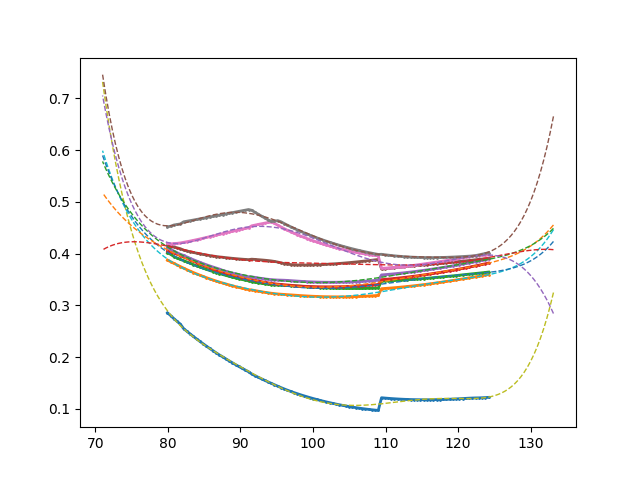

(100, 8)


In [95]:
#%matplotlib notebook
#ratio     = (16, 9)
#_, ax1  = plt.subplots(figsize=ratio)


_, ax1  = plt.subplots()

y=potential[14,25,:,:]
x=thes

plt.plot(x,y, ls='-', lw=2, marker = 'o',markersize = '1');

print(y.shape)

coefficients = np.apply_along_axis(np.polyfit,0,x,y,6)

ncoe,states = coefficients.shape

new_x = expARR(x,20)

functs = np.array([ np.poly1d(coefficients[:,i])(new_x) for i in range(states)])

new_y = functs.T

plt.plot(new_x, new_y, ls='--', lw=1);



In [96]:
def pot2D(potential,state,kind,dim):
    
    print('Doing cut in {} with value ({:8.4f},{:8.4f})'.format(kind,dimV[kind][dim],dims[kind][dim]))
    if kind == 'Phi':
        pot = potential[dim,:,:,state]
        do3dplot(gams,thes,pot)
    elif kind == 'Gam':
        pot = potential[:,dim,:,state]
        do3dplot(phis,thes,pot)
    elif kind == 'The':
        pot = potential[:,:,dim,state]
        do3dplot(phis,gams,pot)


dimV = { 'Phi': phiV, 'Gam': gamV, 'The': theV } # real values
dims = { 'Phi': phis, 'Gam': gams, 'The': thes } # for labels

state = 0
kinds = ['Phi','Gam','The']

def fun_pot2D(kind,state,dim):
    pot2D(potential, state,kind, dim)
    
def nested(kinds):
    dimensionV = dimV[kinds]
    interact(fun_pot2D, kind=fixed(kinds), state = widgets.IntSlider(min=0,max=7,step=1,value=0), dim = widgets.IntSlider(min=0,max=(len(dimensionV)-1),step=1,value=0))

interact(nested, kinds = ['Phi','Gam','The']);

interactive(children=(Dropdown(description='kinds', options=('Phi', 'Gam', 'The'), value='Phi'), Output()), _d…

In [97]:
%matplotlib notebook

def polinomial_fitting(true_lines,both_cut, phi_cut, gam_cut, expand_N, degree_fit):
    cut_sx, cut_dx = both_cut
    _, ax1  = plt.subplots()
    y = potential[phi_cut,gam_cut,cut_sx:cut_dx,:]
    x = thes[cut_sx:cut_dx]
    tit = 'Phi = {:8.4f} | Gamma = {:8.4f}'.format(phis[phi_cut], gams[gam_cut])
    plt.title(tit)
    if true_lines:
        plt.plot(x,y, ls='-', lw=2, marker = 'o',markersize = '1');
    coefficients = np.apply_along_axis(np.polyfit,0,x,y,degree_fit)
    ncoe, states = coefficients.shape
    new_x = expARR(x,expand_N)
    functs = np.array([ np.poly1d(coefficients[:,i])(new_x) for i in range(states)])
    new_y = functs.T
    plt.plot(new_x, new_y, ls='--', lw=1);
    
interact(polinomial_fitting,
         true_lines = widgets.Checkbox(value=True, description='True values'),
         both_cut = widgets.IntRangeSlider(min=0,max=theL-1,step=1,value=[0, theL-1]),
         #cut_sx = widgets.IntSlider(min=0,max=theL-1,step=1,value=0),
         #cut_dx = widgets.IntSlider(min=0,max=theL-1,step=1,value=theL),
         phi_cut = widgets.IntSlider(min=0,max=phiL-1,step=1,value=0), 
         gam_cut = widgets.IntSlider(min=0,max=gamL-1,step=1,value=0), 
         expand_N = widgets.IntSlider(min=0,max=40,step=1,value=0),
         degree_fit = widgets.IntSlider(min=0,max=10,step=1,value=2));


interactive(children=(Checkbox(value=True, description='True values'), IntRangeSlider(value=(0, 99), descripti…

<IPython.core.display.Javascript object>


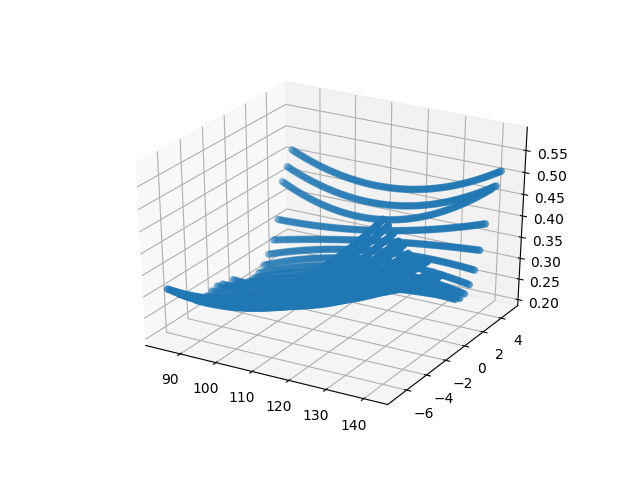

16.614999999999998

In [98]:

degree_fit = 2

expand_N = 40

fittedOnes = np.empty((25, 26, 50+expand_N+expand_N, 8))

for pi, p in enumerate(phis):
    for gi, g in enumerate(gams):
        y = potential[pi,gi,0:50,:]
        x = thes[0:50]
        coefficients = np.apply_along_axis(np.polyfit,0,x,y,degree_fit)
        ncoe, states = coefficients.shape
        new_x = expARR(x,expand_N)
        functs = np.array([ np.poly1d(coefficients[:,i])(new_x) for i in range(states)])
        fittedOnes[pi,gi] = functs.T

val = 14
#do3dplot(phis,gams,fittedOnes[:,:,val,7])
do3dplot(phis,new_x,fittedOnes[:,val,:,5])
gams[val]

# Add Thetas on the right of the potential

In [99]:
def add_theta_RIGHT(potential,p,g,s,theV,cutDx,expand,graph=None):
    #theV = theV
    #p = 10
    #g = 15
    #s = 0
    #cutDx = 50
    #degree_fit = 2
    #expand = 14
    #
    graph = graph or False
    # declare graph
    if graph:
        _, ax1  = plt.subplots()
        ax1.xlabel = 'Theta'
        ax1.ylabel = 'Potential'
    # line from scan
    line = potential[p,g,:,s]
    
    # cut line
    y_cut_to_fit = line[:cutDx]
    x_cut_to_fit = theV[:cutDx]
    
    # interpolate cut line
    coefficients = np.polyfit(x_cut_to_fit,y_cut_to_fit,degree_fit)
    new_x_for_fit = expARR(x_cut_to_fit,expand,'sx')
    functs = np.poly1d(coefficients)
    fit_line = functs(new_x_for_fit)

    

    # find the intersection point on the DX (sx in graph)
    difference = fit_line[expand:]-y_cut_to_fit     # I need them to be the same size, so I take out #expand elements 
    v = np.sign(difference)                         # v is a bunch of 1 and -1
    switch_index = np.where(v[:-1] != v[1:])[0][-1] # this is the last time (index) that the sign will change on the difference.
    switch_value_on_x = x_cut_to_fit[switch_index]
        
    new_x_full_line = expARR(theV,expand,'sx')

    index_on_the_line = np.where(theV==switch_value_on_x)[0][0] # this return a tuple two arrays. To get the unique element [0][0]
    index_on_fit_line = np.where(new_x_for_fit==switch_value_on_x)[0][0]

    final_line = np.concatenate((fit_line[:index_on_fit_line+1],line[index_on_the_line+1:]))  # <- yeah... plus 1 is the good one...

    if graph:
        plt.plot(theV,line, label='Scan',ls='--',lw = 3)
        plt.plot(new_x_for_fit,fit_line,label='Fit',ls='--',lw = 1)
        plt.plot(x_cut_to_fit, y_cut_to_fit+0.01, label='Portion_where_fit_apply',ls='--',lw = 2,marker='*')
        plt.plot(new_x_full_line,final_line-0.01,ls='-',lw = 3,label='Final_Expanded_Line')
        plt.legend()
    else:
        return(final_line)

def interact_fit_2(phi_cut,gam_cut,state,expand_N):
    return add_theta_RIGHT(potential,phi_cut,gam_cut,state,theV,60,expand_N,True)
    
interact(interact_fit_2,
         phi_cut = widgets.IntSlider(min=0,max=phiL-1,step=1,value=0), 
         gam_cut = widgets.IntSlider(min=0,max=gamL-1,step=1,value=0),
         state = widgets.IntSlider(min=0,max=7,step=1,value=0),
         expand_N = widgets.IntSlider(min=0,max=40,step=1,value=30));



interactive(children=(IntSlider(value=0, description='phi_cut', max=24), IntSlider(value=0, description='gam_c…

In [100]:
phiN, gamN, theN, nstates = potential.shape
expand = 40

new_x_full_line = expARR(theV,expand,'sx')
new_potential = np.empty((phiN, gamN, theN + expand, nstates))

for s in range(nstates):
    for p in range(phiN):
        for g in range(gamN):
            new_potential[p,g,:,s] = add_theta_RIGHT(potential,p,g,s,theV,50,expand)

<IPython.core.display.Javascript object>


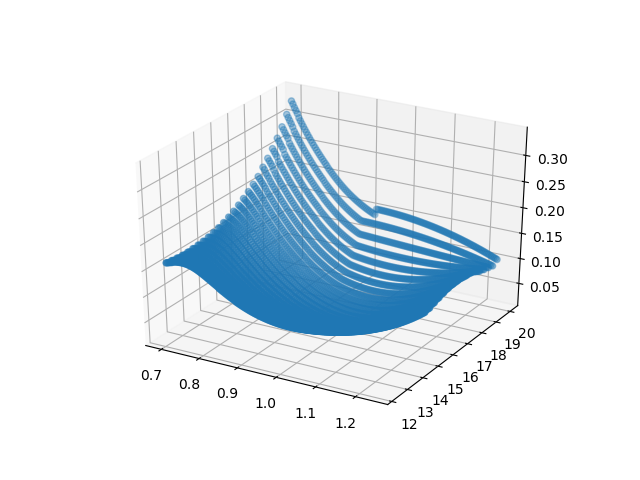

<IPython.core.display.Javascript object>


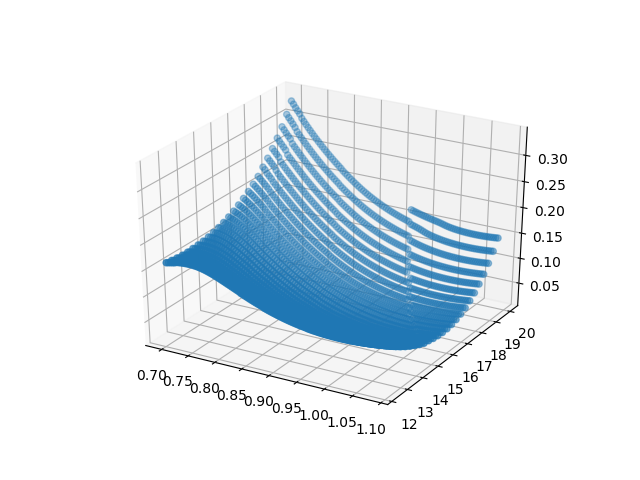

In [101]:
phi = 18
state = 0
do3dplot(gams,new_x_full_line,new_potential[phi,:,:,state])
do3dplot(gams,theV,potential[phi,:,:,state])

In [102]:
print(phiV,gamV,theV)
ground = potential[:,:,:,0]
ground.shape

[-0.07  -0.065 -0.06  -0.055 -0.05  -0.045 -0.04  -0.035 -0.03  -0.025
 -0.02  -0.015 -0.01  -0.005  0.     0.005  0.01   0.015  0.02   0.025
  0.03   0.035  0.04   0.045  0.05 ] [ 0.21481512  0.22017329  0.2255489   0.23092451  0.23628267  0.24165829
  0.2470339   0.25240952  0.25776768  0.26314329  0.26851891  0.27387707
  0.27925268  0.28462829  0.28998646  0.29536207  0.30073768  0.30609584
  0.31147146  0.31684707  0.32222269  0.32758085  0.33295646  0.33833208
  0.34369024  0.34906585] [ 1.0837622   1.07986139  1.07596058  1.07205977  1.06815896  1.06425814
  1.06035733  1.05645652  1.05256444  1.04866363  1.04476282  1.04086201
  1.0369612   1.03306038  1.02915957  1.02525876  1.02135795  1.01745714
  1.01355633  1.00965552  1.00575471  1.0018539   0.99796181  0.994061
  0.99016019  0.98625938  0.98235857  0.97845776  0.97455695  0.97065614
  0.96675533  0.96285452  0.9589537   0.95505289  0.95115208  0.94725127
  0.94335919  0.93945838  0.93555757  0.93165675  0.92775594  0.923

(25, 26, 100)

In [132]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x = np.linspace(-3,3,50)
y = np.linspace(-3,3,60)

X,Y = np.meshgrid(x,y)
Z = np.sin(X) * np.sin(Y)

poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)
clf = LinearRegression()
clf.fit(X_, Z)

predict = [[0.49, 0.18]]
predict_ = poly.fit_transform(predict)
clf.predict(predict_)


fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, s=3, alpha=.5, color='k', marker='o');

ValueError: shapes (1,6) and (1326,50) not aligned: 6 (dim 1) != 1326 (dim 0)

<IPython.core.display.Javascript object>


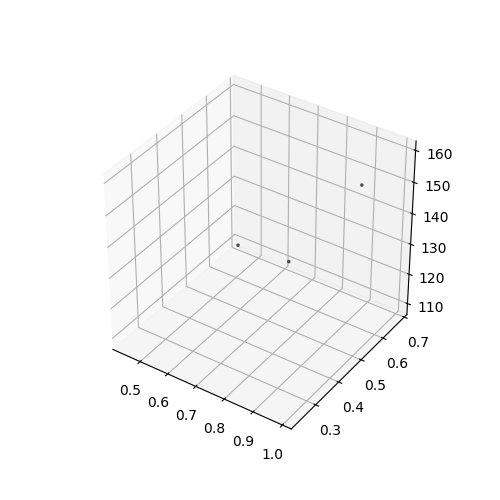

array([[ 1.    ,  0.44  ,  0.68  ,  0.1936,  0.2992,  0.4624],
       [ 1.    ,  0.99  ,  0.23  ,  0.9801,  0.2277,  0.0529],
       [ 1.    ,  0.99  ,  0.53  ,  0.9801,  0.5247,  0.2809]])

In [78]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#X is the independent variable
X = np.array([[0.44, 0.68], [0.99, 0.23], [0.99, 0.53]])

#vector is the dependent data
vector = np.array([109.85, 155.72, 159.30])

#predict is an independent variable for which we'd like to predict the value
predict= [[0.49, 0.18]]

#generate a model of polynomial features
poly = PolynomialFeatures(degree=2)

#transform the x data for proper fitting (for single variable type it returns,[1,x,x**2])
X_ = poly.fit_transform(X)

#transform the prediction to fit the model type
predict_ = poly.fit_transform(predict)

#here we can remove polynomial orders we don't want
#for instance I'm removing the `x` component
#X_ = np.delete(X_,(1),axis=1)
#predict_ = np.delete(predict_,(1),axis=1)

#generate the regression object
clf = LinearRegression()
#preform the actual regression
clf.fit(X_, vector)

#print("X_ = ",X_)
#print("predict_ = ",predict_)
#print("Prediction = ",clf.predict(predict_))

x = X[:,0]
y = X[:,1]
z = vector

x.shape,y.shape,z.shape

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=3, alpha=.5, color='k', marker='o');

X_


In [31]:
def addSecondDerivativepoints_the_left(potential, howmany):
    
    cut_for_fitting = 50
    degree_fit = 2
    newone = np.empty((phiN,gamN,theN+howmany,nstates))
    print(newone.shape)
    y = potential[:,:,cut_for_fitting:,:]
    x = thes[cut_for_fitting:]

    
#    for s in range(nstates):
#        for p in range(phiN):
#            for g in range(gamN):
#                yline = y[p,g,:,s]
#                coefficients = np.polyfit(x,yline,degree_fit)
#                new_x = expARR(x,howmany)
#                #functs = np.poly1d(coefficients,new_x)
    
    
    
#addSecondDerivativepoints_the_left(potential,40)

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-31-bd22bf090573>, line 10)

# Surface interpolation

In [12]:
from scipy.interpolate import RegularGridInterpolator
from numpy import linspace, zeros, array
x = linspace(1,4,11)
y = linspace(4,7,22)
z = linspace(7,9,33)
V = zeros((11,22,33))

for i in range(11):
    for j in range(22):
        for k in range(33):
            V[i,j,k] = 100*x[i] + 10*y[j] + z[k]

fn = RegularGridInterpolator((x,y,z), V)
pts = array([[2,6,8],[3,5,7]])
print(fn(pts))

[ 268.  357.]


In [13]:
#phiV,gamV,np.flip(theV,0),potential.shape

In [14]:
nstates = 8

# h is for "here" i.e. in this point of the code (not extrapolated)

phi_h = phiV
gam_h = gamV
the_h = np.flip(theV,0)

pp_h,gg_h,tt_h = qp.fromFloatsToLabels(phi_h, gam_h, the_h)
ppL_h = len(pp_h)
ggL_h = len(gg_h)
ttL_h = len(tt_h)

int_pot_linear = np.empty((ppL_h,ggL_h,ttL_h,nstates))
int_pot_nearest = np.empty((ppL_h,ggL_h,ttL_h,nstates))


for s in range(nstates):
    print('Doing state {}.'.format(s))
    aa = potential[:,:,:,s]
    fnn1 = RegularGridInterpolator((phi_h,gam_h,the_h), aa, method='linear')
    fnn2 = RegularGridInterpolator((phi_h,gam_h,the_h), aa, method='nearest')
    for pi, p in qp.log_progress(enumerate(phi_h),every=1,size=(len(phi_h))):
        for gi, g in enumerate(gam_h):
            for ti,t in enumerate(the_h):
                int_pot_linear[pi,gi,ti,s] = fnn1(array([p,g,t]))
                int_pot_nearest[pi,gi,ti,s] = fnn2(array([p,g,t]))
               

Doing state 0.


Doing state 1.


Doing state 2.


Doing state 3.


Doing state 4.


Doing state 5.


Doing state 6.


Doing state 7.


Doing cut in Phi with value ( -0.0700, -7.0000)


<IPython.core.display.Javascript object>


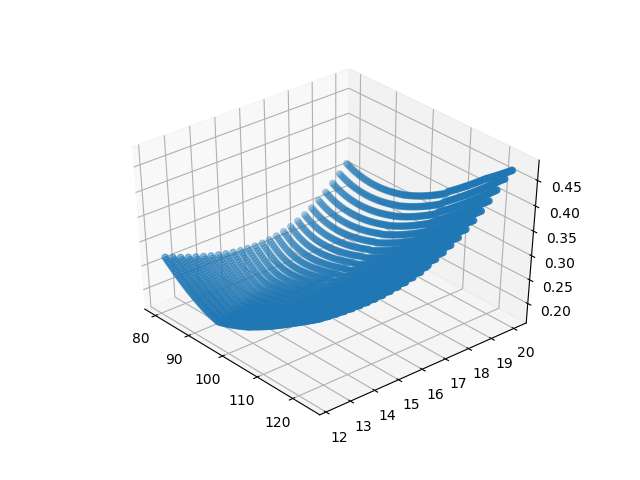

In [32]:
def fun_pot2D_inter(kind,state,dim):
    pot2D(int_pot_linear, state,kind, dim)
    #pot2D(int_pot_nearest, state,kind, dim)

fun_pot2D_inter('Phi',1,0)

# Double the grid

In [18]:
phiV,gamV,theV

(array([-0.07 , -0.065, -0.06 , -0.055, -0.05 , -0.045, -0.04 , -0.035,
        -0.03 , -0.025, -0.02 , -0.015, -0.01 , -0.005,  0.   ,  0.005,
         0.01 ,  0.015,  0.02 ,  0.025,  0.03 ,  0.035,  0.04 ,  0.045,
         0.05 ]),
 array([ 0.21481512,  0.22017329,  0.2255489 ,  0.23092451,  0.23628267,
         0.24165829,  0.2470339 ,  0.25240952,  0.25776768,  0.26314329,
         0.26851891,  0.27387707,  0.27925268,  0.28462829,  0.28998646,
         0.29536207,  0.30073768,  0.30609584,  0.31147146,  0.31684707,
         0.32222269,  0.32758085,  0.33295646,  0.33833208,  0.34369024,
         0.34906585]),
 array([ 1.0837622 ,  1.07986139,  1.07596058,  1.07205977,  1.06815896,
         1.06425814,  1.06035733,  1.05645652,  1.05256444,  1.04866363,
         1.04476282,  1.04086201,  1.0369612 ,  1.03306038,  1.02915957,
         1.02525876,  1.02135795,  1.01745714,  1.01355633,  1.00965552,
         1.00575471,  1.0018539 ,  0.99796181,  0.994061  ,  0.99016019,
         0.98

In [20]:
# gestionate Phi
refi_phi = 1
expandi_phi = 0

phis_n = phiV
phis_n = expARR(phis_n,expandi_phi)
for _ in range(refi_phi):
    phis_n = doubleAxespoins(phis_n)


# gestionate Gam
refi_gam = 1
expandi_gam = 0

gams_n = gamV
gams_n = expARR(gams_n,expandi_gam)
for _ in range(refi_gam):
    gams_n = doubleAxespoins(gams_n)


# gestionate The
refi_the = 1
expandi_the = 0

thes_n = theV
thes_n = expARR(thes_n,expandi_the)
for _ in range(refi_the):
    thes_n = doubleAxespoins(thes_n)

# equilibrium indices and equilibrium points
p0 = phis_n[(gsm_phi_ind+expandi_phi)*2**refi_phi] 
g0 = gams_n[(gsm_gam_ind+expandi_gam)*2**refi_gam]
t0 = thes_n[(gsm_the_ind+expandi_the)*2**refi_the]

print(p0,g0,t0)
    
    
pp,gg,tt = qp.fromFloatsToLabels(phis_n, gams_n, thes_n)
ppL = len(pp)
ggL = len(gg)
ttL = len(tt)

0.0 0.295362069315 1.00185389723


In [21]:
phis_n,gams_n,thes_n

(array([-0.07  , -0.0675, -0.065 , -0.0625, -0.06  , -0.0575, -0.055 ,
        -0.0525, -0.05  , -0.0475, -0.045 , -0.0425, -0.04  , -0.0375,
        -0.035 , -0.0325, -0.03  , -0.0275, -0.025 , -0.0225, -0.02  ,
        -0.0175, -0.015 , -0.0125, -0.01  , -0.0075, -0.005 , -0.0025,
         0.    ,  0.0025,  0.005 ,  0.0075,  0.01  ,  0.0125,  0.015 ,
         0.0175,  0.02  ,  0.0225,  0.025 ,  0.0275,  0.03  ,  0.0325,
         0.035 ,  0.0375,  0.04  ,  0.0425,  0.045 ,  0.0475,  0.05  ]),
 array([ 0.21481512,  0.2174942 ,  0.22017329,  0.22286109,  0.2255489 ,
         0.22823671,  0.23092451,  0.23360359,  0.23628267,  0.23897048,
         0.24165829,  0.2443461 ,  0.2470339 ,  0.24972171,  0.25240952,
         0.2550886 ,  0.25776768,  0.26045548,  0.26314329,  0.2658311 ,
         0.26851891,  0.27119799,  0.27387707,  0.27656487,  0.27925268,
         0.28194049,  0.28462829,  0.28730737,  0.28998646,  0.29267426,
         0.29536207,  0.29804988,  0.30073768,  0.30341676,  0.

In [22]:
print('       |  eq.    #p.     dx       dL')
strngOut = 'Phi:   {:8.4f} {:4} {:10.3e} {:10.3e} \nGamma: {:8.4f} {:4} {:10.3e} {:10.3e} \nTheta: {:8.4f} {:4} {:10.3e} {:10.3e}'
print(strngOut.format(p0,len(phis_n),phis_n[1]-phis_n[0],phis_n[-1]-phis_n[0],g0,len(gams_n), gams_n[1]-gams_n[0],gams_n[-1]-gams_n[0],t0,len(thes_n),thes_n[1]-thes_n[0],thes_n[-1]-thes_n[0]))

       |  eq.    #p.     dx       dL
Phi:     0.0000   49  2.500e-03  1.200e-01 
Gamma:   0.2954   51  2.679e-03  1.343e-01 
Theta:   1.0019  199 -1.950e-03 -3.861e-01


In [24]:
doublALL = np.zeros((ppL,ggL,ttL))
doublALL2 = np.zeros((ppL,ggL,ttL,8))
kineti = np.zeros((ppL,ggL,ttL,9,3))
smo = np.zeros((ppL,ggL,ttL,3,24))
geom = np.zeros((ppL,ggL,ttL,15,3))

p_s = 100
g_s = 100
t_s = 100

# Toggle this to calculate harmonic potentials
saveNew = False

if saveNew:
    for pi, p in qp.log_progress(enumerate(phis_n),every=1,size=(len(phis_n))):
        for gi, g in enumerate(gams_n):
            for ti,t in enumerate(thes_n):
                doublALL[pi,gi,ti] = p_s*(p-p0)**2 + g_s*(g-g0)**2 + t_s*(t-t0)**2
                kineti[pi,gi,ti] = qp.calc_g_G(p,g,t)
                smo[pi,gi,ti] = qp.calc_s_mat(p,g,t)
                geom = qp.generateNorbGeometry(p,g,t,True) # True is the "vector" mode that does not save any file
            
    doublALL2[:,:,:,0] = doublALL

    newdict = {}
    newdict['smoCube'] = smo
    newdict['kinCube'] = kineti
    newdict['potCube'] = doublALL2
    newdict['dipCUBE'] = np.zeros((ppL,ggL,ttL,3,8,8))
    newdict['geoCUBE'] = geom
    newdict['phis'] = pp
    newdict['gams'] = gg
    newdict['thes'] = tt

    np.save('doubledoublefinerArmonic.npy', newdict)
    qp.printDict(newdict)

# Attempt at doing absorbing potential

In [25]:
#%matplotlib inline

a = 1
b = 50
c = 9
re = np.pi-0.01

x = np.linspace(-10,10,50)

#y = a * (np.arctan(b*(x + c)) + np.arctan(b*(x - c)))

y = a * ((-np.arctan(b*(x + c)) + np.arctan(b*(x - c)))+re)

y = np.where(y<0,0,y)

plt.plot(x,y)

y

array([  3.11264795e+00,   3.09888815e+00,   3.02423097e+00,
         7.99814578e-02,   2.27539643e-02,   1.03926232e-02,
         5.01032456e-03,   2.00775189e-03,   9.96752819e-05,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   9.96752819e-05,
         2.00775189e-03,   5.01032456e-03,   1.03926232e-02,
         2.27539643e-02,   7.99814578e-02,   3.02423097e+00,
         3.09888815e+00,

# CENTER OF MASS

In [26]:
dataDict['geoCUBE'].shape

(25, 26, 100, 15, 3)

In [27]:
Mc = qp.massOf('C')
Mh = qp.massOf('H')

def massCenter(geom):
    masses = np.array([Mc,Mc,Mc,Mh,Mh,Mh,Mh,Mc,Mc,Mc,Mc,Mh,Mh,Mh,Mh])
    total_mass = sum(masses)
    zcoor = geom[:,2]
    z_cm = sum(masses * zcoor)
    return(z_cm/total_mass)

    
equi = dataDict['geoCUBE'][gsm_phi_ind, gsm_gam_ind, gsm_the_ind]



In [28]:
centerofMass = np.empty((phiL,gamL,theL))

for pi, p in qp.log_progress(enumerate(phiV),every=1,size=(phiL)):
    for gi, g in enumerate(gamV):
        for ti,t in enumerate(theV):
            centerofMass[pi,gi,ti] = massCenter(dataDict['geoCUBE'][pi,gi,ti])
    
centerofMass.shape

(25, 26, 100)

<IPython.core.display.Javascript object>


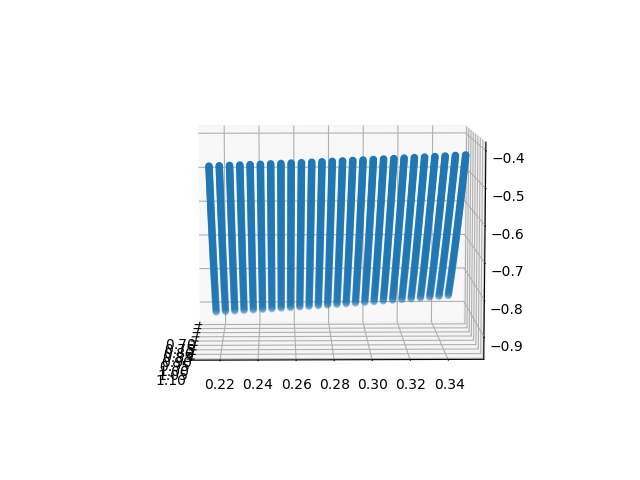

<IPython.core.display.Javascript object>


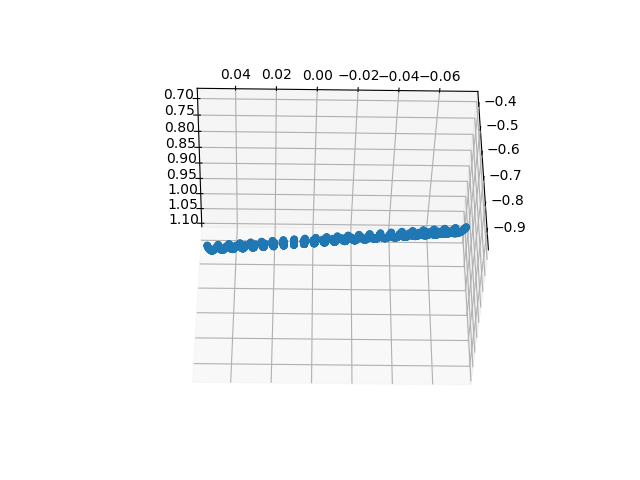

<IPython.core.display.Javascript object>


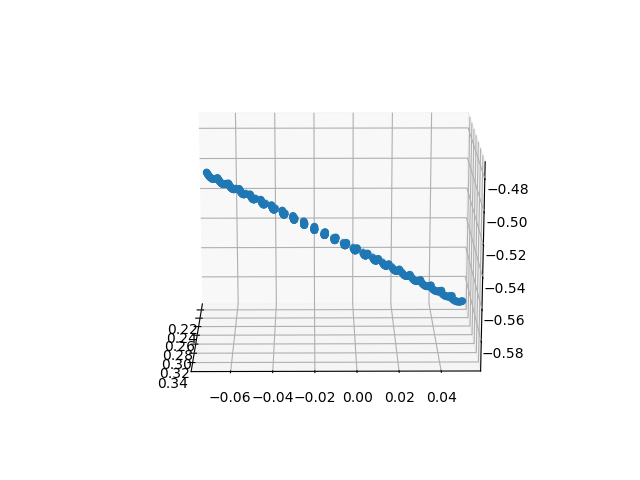

In [29]:
#%matplotlib notebook
do3dplot(gamV,theV,centerofMass[gsm_phi_ind,:,:])
do3dplot(phiV,theV,centerofMass[:,gsm_gam_ind,:])
do3dplot(phiV,gamV,centerofMass[:,:,gsm_the_ind])